In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob, os, shutil
from skimage.feature import peak_local_max
from scipy.signal import find_peaks, peak_widths
from scipy.signal import savgol_filter
from scipy.integrate import simpson
from numpy import trapz

In [2]:
os.chdir('C:/Users/robin/Programs/Candy_Collect/Grant/Database/')

In [3]:
df = pd.read_csv('k.csv')

## Restructures the 1D array back to the original 2D array, and then trims the perimeter to minimize edge effects

In [4]:
def reconstruct_array(row, column_name):
    array_flat = np.fromstring(row[column_name], sep=',')
    return array_flat

In [5]:
for col in ['N1', 'N2', 'N3', 'N4']:
    df[col] = df.apply(reconstruct_array, axis=1, column_name=col)

In [6]:
for i in range(len(df)):
    df.N1[i] = df.N1[i].reshape((70, 270))
    df.N2[i] = df.N2[i].reshape((70, 270))
    df.N3[i] = df.N3[i].reshape((70, 270))
    df.N4[i] = df.N4[i].reshape((70, 270))

In [7]:
for i in range(len(df)):
    df.N1[i] = df.N1[i][5:65, 10:260]
    df.N2[i] = df.N2[i][5:65, 10:260]
    df.N3[i] = df.N3[i][5:65, 10:260]
    df.N4[i] = df.N4[i][5:65, 10:260]

## Analysis

In [8]:
def peak(img):
    bw_smooth = savgol_filter(np.mean(img, axis=0), 5, 2)
    peaks, _ = find_peaks(bw_smooth, distance=100)
    return bw_smooth[peaks[0]], peaks[1]-peaks[0], bw_smooth, peaks

In [9]:
a, b, c, d = peak(df.N4[5])

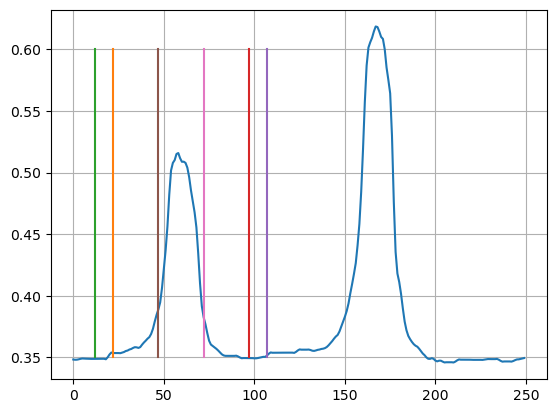

In [10]:
plt.plot(c)
plt.plot([d[1] - (110+35), d[1] - (110+35)], [.35, .6])
plt.plot([d[1] - (110+45), d[1] - (110+45)], [.35, .6])
plt.plot([d[1] - [(110/2) + 15], d[1] - [(110/2) + 15]], [.35, .6])
plt.plot([d[1] - [(110/2) + 5], d[1] - [(110/2) + 5]], [.35, .6])
plt.plot([d[1] - 120, d[1] - 120], [.35, .6])
plt.plot([d[1] - 95, d[1] - 95], [.35, .6])
plt.grid()

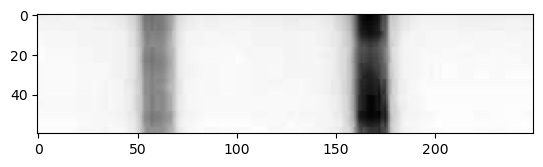

In [11]:
plt.imshow(df.N4[5], cmap='Greys')

In [12]:
# np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])

In [13]:
# np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])

In [14]:
# np.amax(c[d[1] - 120:d[1] - 95])/np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])

In [15]:
# 1.02 + 3*np.std([1.02, 1.01, 1.01, 1.01])

In [16]:
N1_SBR, N2_SBR, N3_SBR, N4_SBR = [], [], [], []

for i in range(len(df)):
    a, b, c, d = peak(df.N1[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N1_SBR.append(SBR_test_line)
    
for i in range(len(df)):    
    a, b, c, d = peak(df.N2[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N2_SBR.append(SBR_test_line)
    
for i in range(len(df)):    
    a, b, c, d = peak(df.N3[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N3_SBR.append(SBR_test_line)
    
for i in range(len(df)):    
    a, b, c, d = peak(df.N4[i])
    base_l = np.average(c[int(d[1] - (110+45)):int(d[1] - (110+35))])
    base_r = np.average(c[int(d[1] - [(110/2) + 15]):int(d[1] - [(110/2) + 5])])
    SBR_test_line = np.amax(c[d[1] - 120:d[1] - 95])/np.average([base_l, base_r])
    N4_SBR.append(SBR_test_line)

In [17]:
positivity_threshold = np.average([N1_SBR[0], N2_SBR[0], N3_SBR[0], N4_SBR[0]]) + 3*np.std([N1_SBR[0], N2_SBR[0], N3_SBR[0], N4_SBR[0]])
positivity_threshold

1.0264398467773594

## Creating a dataframe of results and saving as a csv file

In [18]:
df_K = pd.DataFrame()

In [19]:
df_K['N1'] = N1_SBR
df_K['N2'] = N2_SBR
df_K['N3'] = N3_SBR
df_K['N4'] = N4_SBR

In [20]:
df_K

,N1,N2,N3,N4
0,1.019125,1.009560,1.006170,1.013262
1,1.021403,1.021977,1.011886,1.048493
2,1.036018,1.048769,1.014381,1.030264
3,1.046402,1.082580,1.065127,1.115157
4,1.139720,1.152858,1.123884,1.116305
5,1.379373,1.346640,1.275544,1.474706
6,1.356132,1.314295,1.350125,1.380861
7,1.409385,1.414890,1.415028,1.305038


In [21]:
df_K.to_csv('SBR_K.csv', index=False)

In [22]:
test = pd.read_csv('SBR_K.csv')

In [23]:
test

,N1,N2,N3,N4
0,1.019125,1.009560,1.006170,1.013262
1,1.021403,1.021977,1.011886,1.048493
2,1.036018,1.048769,1.014381,1.030264
3,1.046402,1.082580,1.065127,1.115157
4,1.139720,1.152858,1.123884,1.116305
5,1.379373,1.346640,1.275544,1.474706
6,1.356132,1.314295,1.350125,1.380861
7,1.409385,1.414890,1.415028,1.305038


In [24]:
np.average(test.iloc[0].tolist()) + 3*np.std(test.iloc[0].tolist())

1.0264398467773592